In [2]:
from music21 import *

# Where do chords move to?

In [6]:
s = corpus.parse('bwv66.6')
sChords = s.chordify()
sChords

<music21.stream.Part Soprano>

In [8]:
sFlat = sChords.flat
sFlat

<music21.stream.Part Soprano_flat>

In [9]:
sOnlyChords = sFlat.getElementsByClass('Chord')

In [10]:
displayPart = stream.Part(id='displayPart')

In [12]:
def appendChordPairs(thisChord, nextChord):
    if ((thisChord.isTriad() is True or
            thisChord.isSeventh() is True) and
                thisChord.root().name == 'A'):
        closePositionThisChord = thisChord.closedPosition(forceOctave=4)
        closePositionNextChord = nextChord.closedPosition(forceOctave=4)

        m = stream.Measure()
        m.append(closePositionThisChord)
        m.append(closePositionNextChord)
        displayPart.append(m)

In [13]:
for i in range(len(sOnlyChords) - 1):
    thisChord = sOnlyChords[i]
    nextChord = sOnlyChords[i + 1]
    appendChordPairs(thisChord, nextChord)

In [14]:
len(displayPart)

7

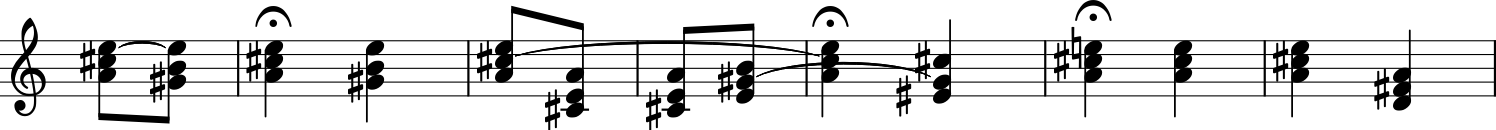

In [15]:
displayPart.show()

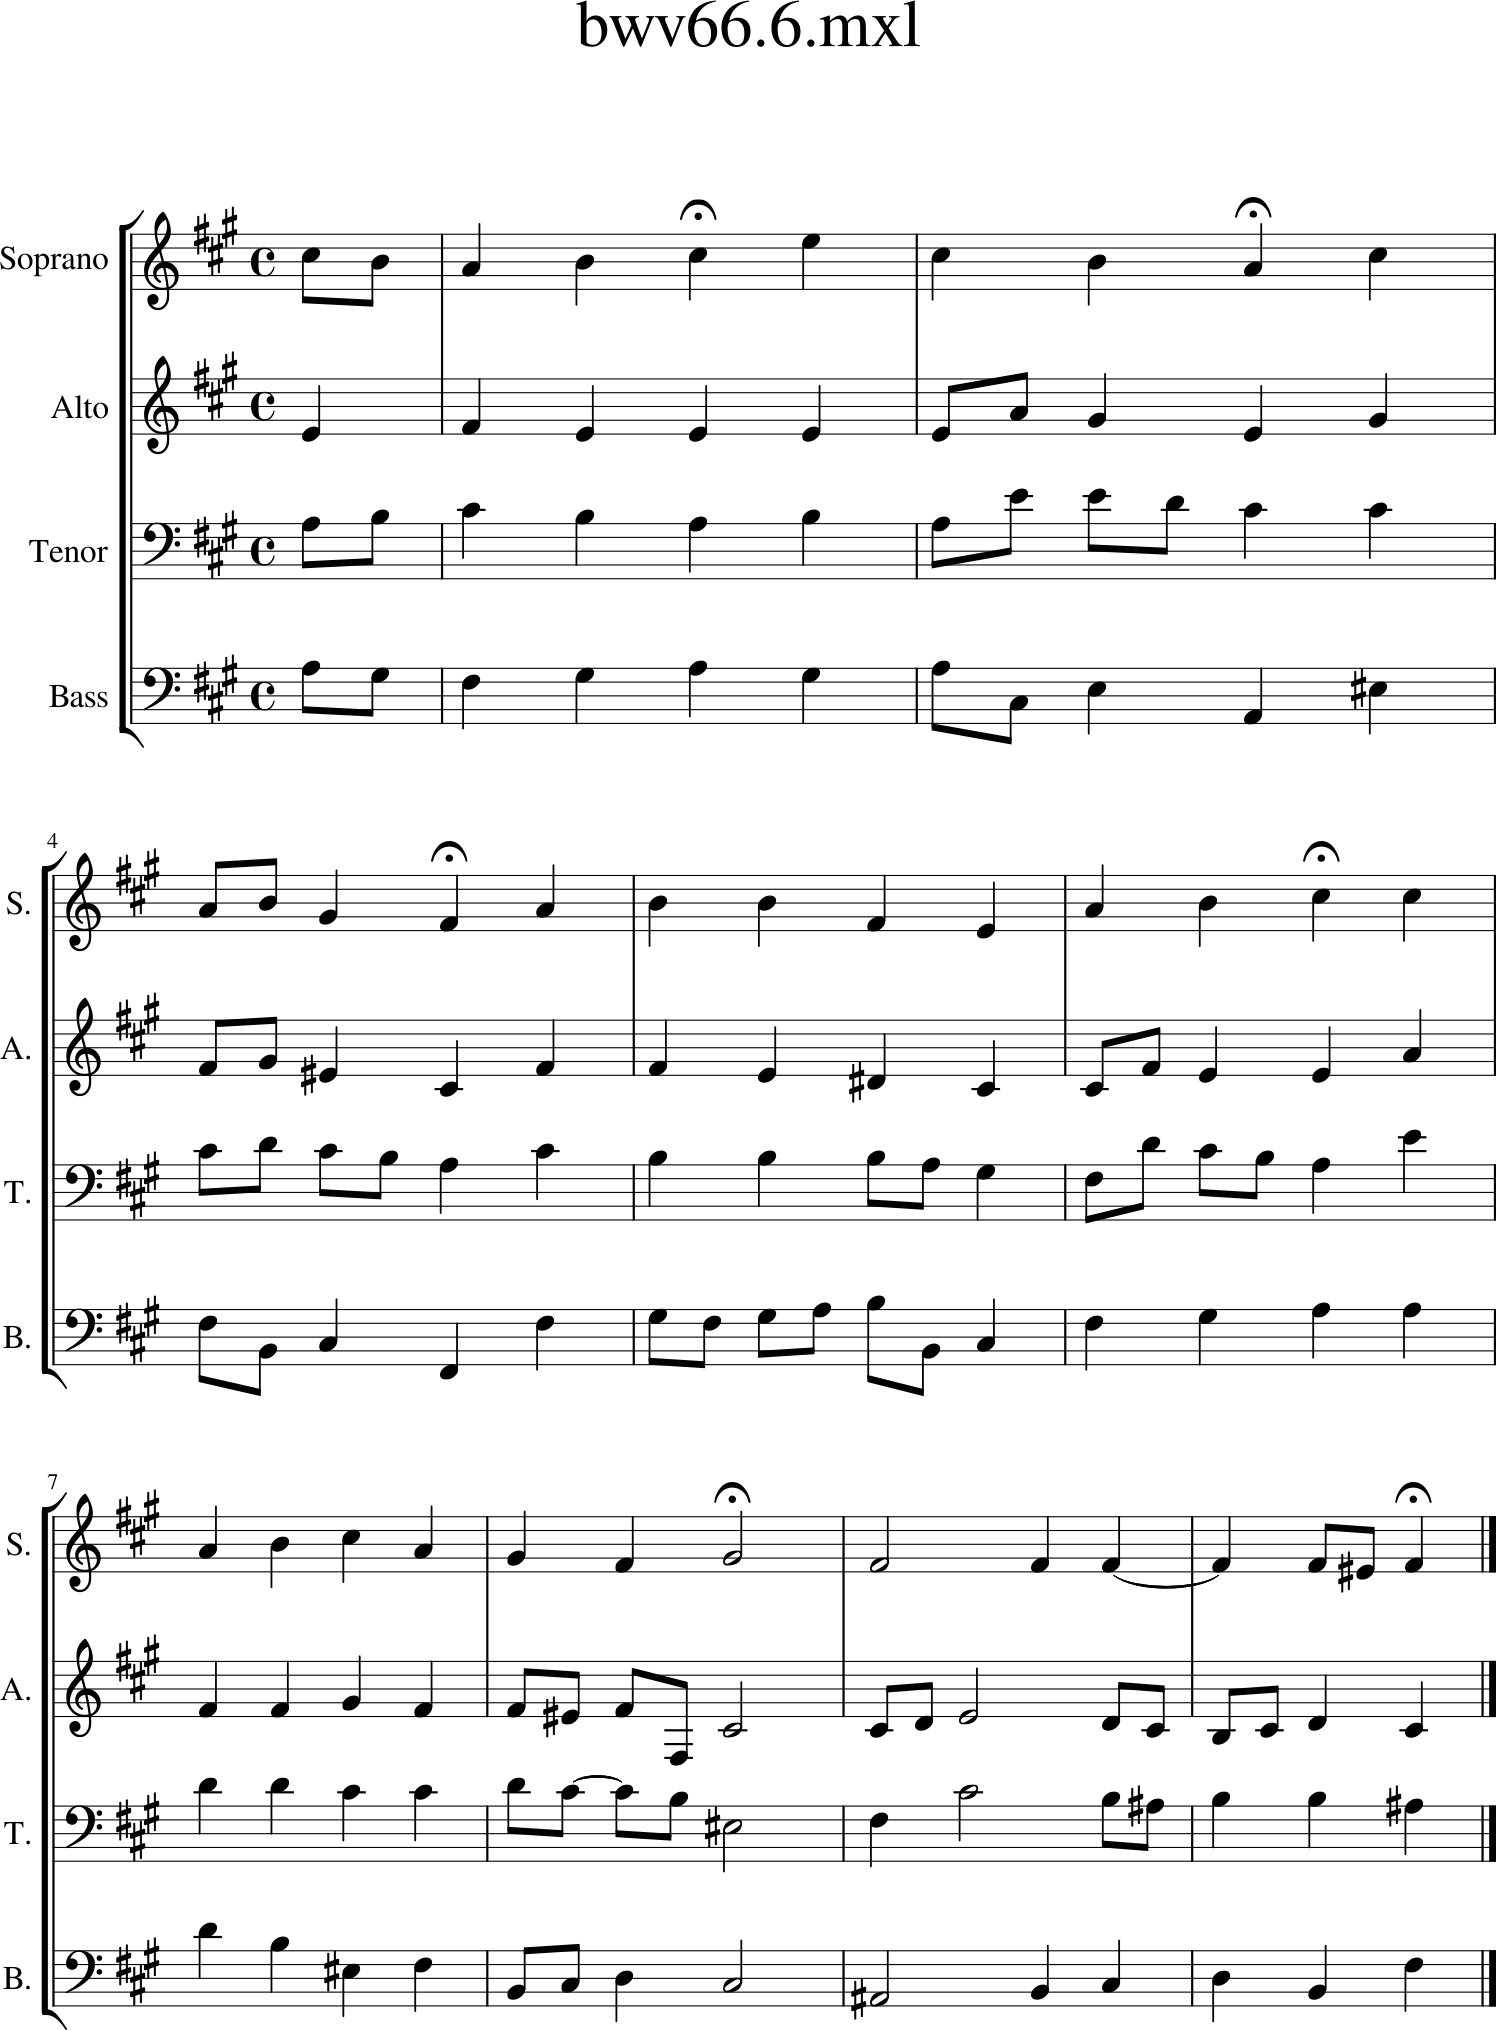

In [16]:
s.show()

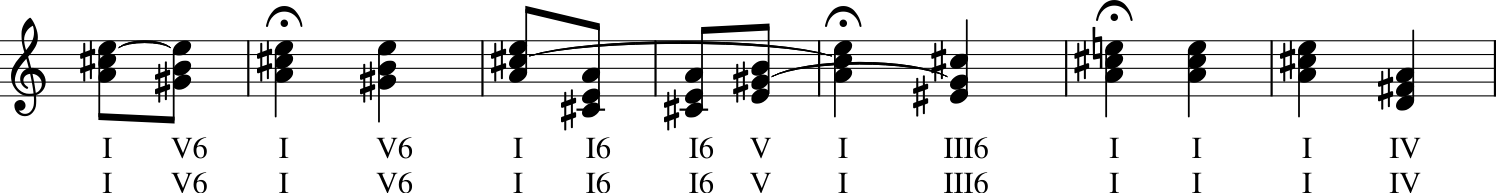

In [19]:
keyA = key.Key('A')
for c in displayPart.recurse().getElementsByClass('Chord'):
    rn = roman.romanNumeralFromChord(c, keyA)
    c.addLyric(str(rn.figure))

displayPart.show()


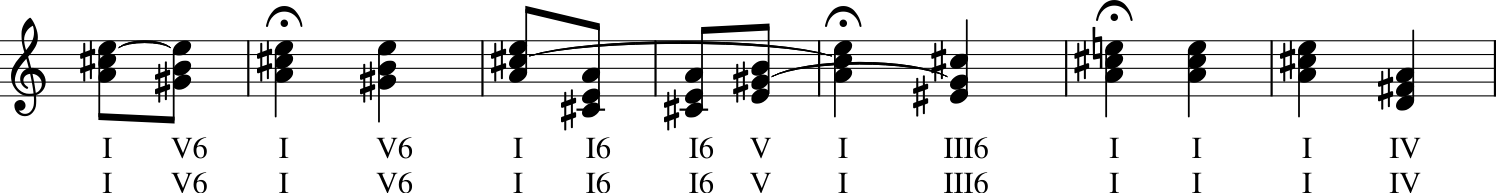

In [20]:
for c in displayPart.recurse().getElementsByClass('Chord'):
    if c.lyric == 'III6':
        c.color = 'pink'
        for x in c.derivation.chain():
            x.color = 'pink'

displayPart.show()

In [21]:
for m in sChords.getElementsByClass('Measure'):
    k = m.analyze('key')
    print(m.number, k)

0 E major
1 E major
2 A major
3 f# minor
4 E major
5 A major
6 f# minor
7 C# major
8 F# major
9 b minor
